In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_pickle('syam')

In [3]:
d1=pd.DataFrame()

In [4]:
df.set_axis(['ECG','PPG','Blood Pressure'],inplace=True,axis=1)

In [5]:
df

,ECG,PPG,Blood Pressure
0,0.225842,1.839741,94.657665
1,0.225903,1.833976,91.752576
2,0.226415,1.828620,98.127438
3,0.226293,1.826783,93.371451
4,0.231586,1.772849,92.790639
...,...,...,...
11995,0.323992,1.798134,73.777829
11996,0.323545,1.827413,75.135241
11997,0.323343,1.772016,77.417335
11998,0.321152,1.772100,82.978911


In [6]:
df.iloc[0]

ECG                0.225842
PPG                1.839741
Blood Pressure    94.657665
Name: 0, dtype: float64

In [7]:
y=df['Blood Pressure']

In [8]:
X=df.drop('Blood Pressure',axis=1)

In [9]:
y

0        94.657665
1        91.752576
2        98.127438
3        93.371451
4        92.790639
           ...    
11995    73.777829
11996    75.135241
11997    77.417335
11998    82.978911
11999    85.315924
Name: Blood Pressure, Length: 12000, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [13]:
X_train

array([[0.72720379, 0.82005773],
       [0.78981875, 0.73057131],
       [0.78579182, 0.75047058],
       ...,
       [0.59997557, 0.83297134],
       [0.88079986, 0.68635664],
       [0.76124284, 0.74462635]])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [15]:
X_train.shape

(8040, 2)

In [16]:
model1=Sequential()
model1.add(Dense(30,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation='relu'))

In [17]:
model1.compile(optimizer='adam',loss='mse')

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
erl=EarlyStopping(monitor='val_loss',patience=20,mode='min',verbose=1)

In [28]:
model1.fit(x=X_train,y=y_train,batch_size=100,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
81/81 [==============================] - 0s 2ms/step - loss: 1419.0945 - val_loss: nan
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 1427.4044 - val_loss: nan
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 1375.2593 - val_loss: nan
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 1377.9323 - val_loss: nan
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 1391.6942 - val_loss: nan
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 1369.0515 - val_loss: nan
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 1386.1520 - val_loss: nan
Epoch 8/100
81/81 [==============================] - 0s 3ms/step - loss: 1363.6920 - val_loss: nan
Epoch 9/100
81/81 [==============================] - 0s 1ms/step - loss: 1339.3506 - val_loss: nan
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 1359.8245 - val_loss: nan
Epoch 11/

81/81 [==============================] - 0s 1ms/step - loss: 973.4855 - val_loss: nan
Epoch 84/100
81/81 [==============================] - 0s 1ms/step - loss: 955.7062 - val_loss: nan
Epoch 85/100
81/81 [==============================] - 0s 1ms/step - loss: 992.4265 - val_loss: nan
Epoch 86/100
81/81 [==============================] - 0s 1ms/step - loss: 936.5469 - val_loss: nan
Epoch 87/100
81/81 [==============================] - 0s 1ms/step - loss: 941.5148 - val_loss: nan
Epoch 88/100
81/81 [==============================] - 0s 1ms/step - loss: 950.4729 - val_loss: nan
Epoch 89/100
81/81 [==============================] - 0s 1ms/step - loss: 938.8371 - val_loss: nan
Epoch 90/100
81/81 [==============================] - 0s 1ms/step - loss: 927.8560 - val_loss: nan
Epoch 91/100
81/81 [==============================] - 0s 1ms/step - loss: 930.9879 - val_loss: nan
Epoch 92/100
81/81 [==============================] - 0s 1ms/step - loss: 938.3290 - val_loss: nan
Epoch 93/100
81/81 [===

In [29]:
losses=pd.DataFrame(model1.history.history)

<AxesSubplot:>

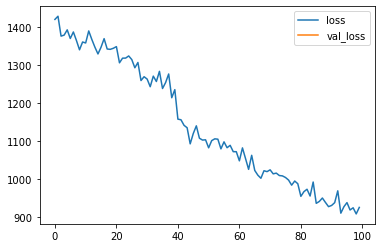

In [30]:
losses.plot()

In [31]:
losses

,loss,val_loss
0,1419.094482,NaN
1,1427.404419,NaN
2,1375.259277,NaN
3,1377.932251,NaN
4,1391.694214,NaN
...,...,...
95,938.466431,NaN
96,919.114380,NaN
97,924.853577,NaN
98,908.777771,NaN


In [32]:
y_test

1935     88.827283
6494     75.543564
1720     78.941206
9120     71.350426
360     103.419991
           ...    
6700     76.320401
4502     99.416621
5294    108.378996
8198    124.717628
211      92.837937
Name: Blood Pressure, Length: 3960, dtype: float64

In [33]:
z=[[0.331586,1.672849]]

In [34]:
model1.predict(scaler.transform(z))

array([[78.1224]], dtype=float32)

In [46]:
scores = model1.evaluate(X,Y,verbose=0)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

NameError: name 'Y' is not defined

In [47]:
model_json = model1.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
import joblib 
joblib.dump(scaler,'bp_scaler.pkl')

['bp_scaler.pkl']

In [50]:
loaded_model = pickle.load('bp_scaler.pkl', 'rb')
result = model1.predict(scaler.transform(z))
print(result)


TypeError: load() takes exactly 1 positional argument (2 given)